# 任务三：数据预处理Preprocessing
【任务目标】
- Preprocessing 实现标准化
- Preprocessing 实现归一化
- Preprocessing 特征二值化
- Preprocessing 实现独热编码
- Preprocessing 实现标签类别编码
标准化和归一化是将连续变量转换为连续变量，压缩其范围  
特征二值化是将连续变量转换为二分类变量  
独热编码和标签类别编码是将字符串型的分类变量转换为数值型分类变量  

## 1、标准化

Standardization标准化:将特征数据的分布调整成标准正太分布，也叫高斯分布，也就是使得数据的均值维0，方差为1。标准化的原因在于如果有些特征的方差过大，则会主导目标函数从而使参数估计器无法正确地去学习其他特征。

标准化的过程为两步：去均值的中心化（均值变为0）；方差的规模化（方差变为1）
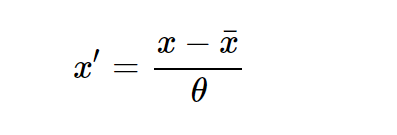

In [1]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# 1. 标准化：去均值，方差规模化
 
x = np.array([[1., -1., 2.],
              [2., 0., 0.],
              [0., 1., -1.]])
# 将每一列特征转换为均值为0，标准差为1的形态，
# 方便标准正态分布对比，注意，标准化是针对每一列而言的
x_scale = preprocessing.scale(x)
x_scale

array([[ 0.        , -1.22474487,  1.33630621],
       [ 1.22474487,  0.        , -0.26726124],
       [-1.22474487,  1.22474487, -1.06904497]])

In [3]:
x_scale.mean()

4.9343245538895844e-17

In [4]:
x_scale[:,0].mean()

0.0

In [5]:
x_scale[:,0].std()

0.9999999999999999

In [6]:
x[:,0].mean()

1.0

In [7]:
X = np.random.randint(-100, 101, (100,3)) / 10

In [8]:
X[:10]

array([[-9.2, -4.2, -2. ],
       [-0.1, -9.4, -4.1],
       [ 6.3,  2.4,  0.2],
       [-8.7,  4.5, -7.9],
       [-8.6,  5.1,  2.5],
       [-0.3,  3.1, -4.5],
       [-5.9, -3.6,  4. ],
       [ 3.7,  5.4,  5.1],
       [-8.6,  8.6, -2.7],
       [ 8.3,  5.5,  7.8]])

In [9]:
np.mean(X,axis = 0)

array([-0.159, -0.238, -0.164])

In [10]:
np.std(X,axis = 0)

array([5.75305302, 6.01944815, 5.5058972 ])

d:\py11\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\py11\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


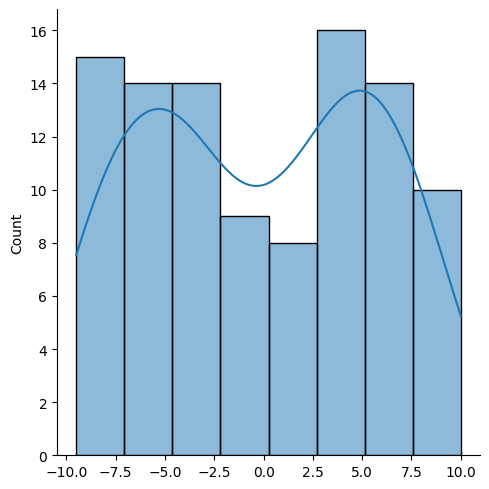

In [11]:
sns.displot(X[:,0], kde = True)

In [12]:
X_scale = preprocessing.scale(X)

In [13]:
X_scale[:10]

array([[-1.57151342, -0.65819987, -0.33346064],
       [ 0.01025542, -1.52206644, -0.71486987],
       [ 1.12270824,  0.43824615,  0.06611093],
       [-1.48460304,  0.78711534, -1.40503895],
       [-1.46722097,  0.88679226,  0.48384485],
       [-0.02450873,  0.55453588, -0.78751924],
       [-0.99790494, -0.55852296,  0.75628001],
       [ 0.67077428,  0.93663071,  0.9560658 ],
       [-1.46722097,  1.46824091, -0.46059705],
       [ 1.47034974,  0.95324353,  1.44644909]])

In [14]:
import scipy

C:\Users\hechang\AppData\Local\Temp\ipykernel_23744\2515068203.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_scale[:,0], fit = scipy.stats.norm)
d:\py11\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\py11\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: ylabel='Density'>

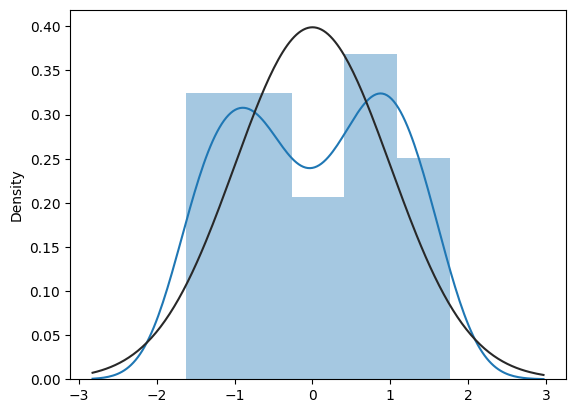

In [15]:
sns.distplot(X_scale[:,0], fit = scipy.stats.norm)

In [16]:
X_scale[:,0].mean()

2.7755575615628914e-17

In [17]:
X_scale[:,0].std()

0.9999999999999998

## 2、归一化

机器学习建模任务中，基于参数的模型或基于距离的模型，一般都需要对连续型特征进行归一化处理

MinMaxScaler：归一化后特征变量各列的数值范围：[0,1]
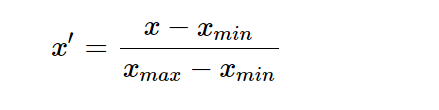

In [18]:
from sklearn.preprocessing import MinMaxScaler
data = [[-1, 2], 
        [-0.5, 6], 
        [0, 10], 
        [1, 18]]
scaler = MinMaxScaler()
print(scaler.fit(data)) # 训练转换器

MinMaxScaler()


In [19]:
print(scaler.data_max_, scaler.data_min_)  # 每列的最大，最小值

[ 1. 18.] [-1.  2.]


In [20]:
print(scaler.transform(data))
# 对原始数据转换之后的结果

[[0.   0.  ]
 [0.25 0.25]
 [0.5  0.5 ]
 [1.   1.  ]]


In [21]:
print(scaler.transform([[2, 2]]))
# 针对新的值进行转换
# 如果转换的新数据超出原始数据的范围，则落到的区间不再是[0,1]

[[1.5 0. ]]


In [22]:
data1 = [
        [-1, 2], 
        [-0.5, 6], 
        [0, 10], 
        [1, 18],
        [2, 2]
        ]
# 把新的数据加入到转换的数据集中

In [23]:
scale1 = MinMaxScaler()
scale1.fit(data1)
# 用新数据集训练

MinMaxScaler()

In [24]:
scale1.transform([[2,2]])

array([[1., 0.]])

### 2.1 特殊的归一化 MaxAbsScaler：归一化后特征变量各列的数值范围 [ -1，1 ]

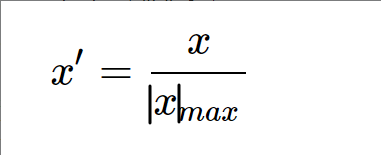

In [25]:
from sklearn.preprocessing import MaxAbsScaler
X = [[ 1., -1.,  2.],
     [ 2.,  0.,  0.],
     [ 0.,  1., -1.]]
transformer = MaxAbsScaler().fit(X)  # 训练
transformer

transformer.transform(X)  # 转换

array([[ 0.5, -1. ,  1. ],
       [ 1. ,  0. ,  0. ],
       [ 0. ,  1. , -0.5]])

In [26]:
X1 = [[ 1., -1.,  2.],
     [ -3.,  0.,  0.],
     [ 0.,  1., -1.]]
transformer1 = MaxAbsScaler().fit(X1)  # 训练
transformer1

transformer1.transform(X1)  # 转换

array([[ 0.33333333, -1.        ,  1.        ],
       [-1.        ,  0.        ,  0.        ],
       [ 0.        ,  1.        , -0.5       ]])

MaxAbsScaler可以保证每列的数据转换后的范围不超过[-1,1]区间，但转换的结果不一定正好在[-1,1]区间，如果希望针对单个特征的转换范围限定在[-1,1]区间，可以使用MinMaxScaler的参数feature_range

In [34]:
min_max_scaler = MinMaxScaler(feature_range = (-1,1))

In [35]:
X

[[1.0, -1.0, 2.0], [2.0, 0.0, 0.0], [0.0, 1.0, -1.0]]

In [36]:
type(X)

list

In [37]:
min_max_scaler.fit(X)   # 训练

MinMaxScaler(feature_range=(-1, 1))

In [38]:
min_max_scaler.transform(X)  # 转换

array([[ 0.        , -1.        ,  1.        ],
       [ 1.        ,  0.        , -0.33333333],
       [-1.        ,  1.        , -1.        ]])

## 3、特征二值化

特征的二值化是指将数值型的特征数据转换成布尔类型的值。可以使用实用类Binarizer。默认是根据0来二值化，大于0的都标记为1，小于等于0的都标记为0。  
将连续变量转换为二分类变量

In [39]:
# 3 二值化–特征的二值化
# 默认是根据0来二值化，大于0的都标记为1，小于等于0的都标记为0。
 
# 创建一组特征数据，每一行表示一个样本，每一列表示一个特征
x = np.array([[1., -1., 2.],
              [20., 0., 0.],
              [0., 1., -1.]])

In [40]:
x

array([[ 1., -1.,  2.],
       [20.,  0.,  0.],
       [ 0.,  1., -1.]])

In [41]:
binarizer = preprocessing.Binarizer()  # 实例化
binarizer.fit(x)  # 训练
binarizer.transform(x)  # 转换

array([[1., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.]])

In [42]:
#当然也可以自己设置这个阀值，只需传出参数threshold即可
binarizer = preprocessing.Binarizer(threshold=1.5)
binarizer.transform(x)

array([[0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 0.]])

In [43]:
a1 = np.random.randint(1,11,(10,3))

In [44]:
a1

array([[ 5,  5,  9],
       [ 6, 10,  8],
       [10,  2,  4],
       [ 1,  5,  8],
       [ 6,  5,  3],
       [ 8, 10,  9],
       [10,  8,  9],
       [ 4,  8,  5],
       [ 8,  6,  5],
       [ 9,  2,  1]])

第一列中>5的值转换为1， <=5的值转换为0

In [45]:
a1[:,0]

array([ 5,  6, 10,  1,  6,  8, 10,  4,  8,  9])

In [46]:
a1[:,0] > 5

array([False,  True,  True, False,  True,  True,  True, False,  True,
        True])

In [47]:
a1[:,0][a1[:,0] <=5] = 0
a1[:,0][a1[:,0] >5] = 1

In [48]:
a1

array([[ 0,  5,  9],
       [ 1, 10,  8],
       [ 1,  2,  4],
       [ 0,  5,  8],
       [ 1,  5,  3],
       [ 1, 10,  9],
       [ 1,  8,  9],
       [ 0,  8,  5],
       [ 1,  6,  5],
       [ 1,  2,  1]])

特征二值化的结果中只有1和0两个类别，该操作的实质是将连续变量转换为二分类变量，而不是像归一化一样将连续变量转换为[0,1]区间的浮点数

## 4、独热编码

机器学习针对对离散的特征大多数都是采用one-hot（独热）编码，该离散特征有多少取值，就用多少维来表示该特征。（会增加数据的列数，多用于对特征的处理）

In [49]:
enc = preprocessing.OneHotEncoder()
# fit来学习编码，独热编码也是针对列进行处理的
enc.fit([[0, 0, 3], 
         [1, 1, 0], 
         [0, 2, 1], 
         [1, 0, 2]])    
# 进行编码
enc.transform([[0, 1, 3],
               [1, 2, 1]]).toarray()  

array([[1., 0., 0., 1., 0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 1., 0., 1., 0., 0.]])

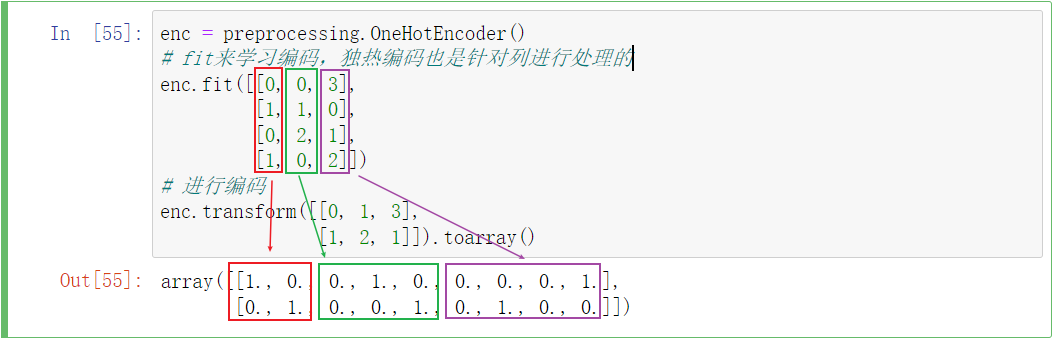

In [50]:
enc.categories_
# 第一个数组对应原始数据第一列中的类别，第二个数组对应第二列，以此类推

[array([0, 1]), array([0, 1, 2]), array([0, 1, 2, 3])]

## 5、标签类别编码

将类别编号是一种常用的数据预处理及特征工程方法，比如把类别“男”，“女”编号为0和1。可以使用sklearn.preprocessing中的LabelEncoder处理这个问题。  
作用是将字符串类型的分类变量转换为数值类型的分类变量，并同时记录每个编码（数字）对应的类别  
优点是不会扩充变量的数量（列的数量），多用于对目标变量的处理

In [51]:
sex = pd.Series(["male", "female", "female", "male"])
#获取一个LabelEncoder
le = preprocessing.LabelEncoder()
#训练LabelEncoder, 把male编码为0，female编码为1
le = le.fit(sex)
#使用训练好的LabelEncoder对原数据进行编码
sex_ = le.transform(sex)  # 正向转换               
print(sex_)

[1 0 0 1]


In [52]:
le.classes_
# 值标签

array(['female', 'male'], dtype=object)

In [53]:
le.inverse_transform([0,1,1,0])
# 根据给定的类别编码，进行反向转换获得值对应的类别名称

array(['female', 'male', 'male', 'female'], dtype=object)

鸢尾花数据集

In [54]:
from sklearn import datasets

In [55]:
iris = datasets.load_iris()

In [56]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [57]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [58]:
targets = iris.target_names.tolist() * 3

In [59]:
targets

['setosa',
 'versicolor',
 'virginica',
 'setosa',
 'versicolor',
 'virginica',
 'setosa',
 'versicolor',
 'virginica']

In [60]:
le_iris = preprocessing.LabelEncoder()

In [61]:
le_iris.fit(targets)  # 训练

LabelEncoder()

In [62]:
le_iris.classes_

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [63]:
le_iris.transform(targets)  # 转换

array([0, 1, 2, 0, 1, 2, 0, 1, 2])

In [64]:
le_iris.inverse_transform([0,2,1,4])
# 反向转换时，不能出现编码中没有出现过的值，否则会报错

ValueError: y contains previously unseen labels: [4]